**Nombre:** Samuel Cortes Salazar \\
**Fecha:** 24/02/2024

In [ ]:
%%writefile Planeta.cpp

#include <iostream>
#include <cmath>
#include "vector.h"
using namespace std;

const double GM=1;

//Declaración de la clase:
class Cuerpo;

//Declaración de la interfase:
class Cuerpo{
  private:
    vector3D r,V,F; double m,R;
  public:
    void Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	        double m0,double R0);
    void CalculeFuerza(void);
    void Muevase(double dt);
    double Getx(void){return r.x();}; // Inline
    double Gety(void){return r.y();}; // Inline
};

//Implementación de las funciones:
void Cuerpo::Inicie(double x0,double y0,double z0,double Vx0,double Vy0,double Vz0,
	      double m0,double R0){
  r.load(x0,y0,z0); V.load(Vx0,Vy0,Vz0); m=m0; R=R0;
}
void Cuerpo::CalculeFuerza(void){
  F.load(-GM*m*r.x()/pow(r.norm(),3),-GM*m*r.y()/pow(r.norm(),3),0);
}
void Cuerpo::Muevase(double dt){
  //Algoritmo de Euler
  r+=V*dt;  V+=F*(dt/m);
}

//----------- Funciones Globales -----------


int main(){
  double t,dt=0.001,ttotal=250,r0=10,omega=sqrt(GM/pow(r0,3)),T=2*M_PI/omega,V0=omega*r0;
  int Ncuadros=200000; double tdibujo,tcuadro=ttotal/Ncuadros;
  Cuerpo Planeta;
  //----------(x0,y0,z0,Vx0,Vy0,Vz0,m0,R0)
  Planeta.Inicie( r0, 0, 0, 0, 0.5*V0, 0, 0.453, 1.0);
  for(t=tdibujo=0;t<ttotal;t+=dt,tdibujo+=dt){
    cout<<Planeta.Getx()<<" "<<Planeta.Gety()<<endl;
    Planeta.CalculeFuerza();
    Planeta.Muevase(dt);
  }
  return 0;
}


Overwriting Planeta.cpp


In [ ]:
%%shell
g++ Planeta.cpp
./a.out > datos.dat

Text(0.5, 1.0, 'Órbita de un planeta')

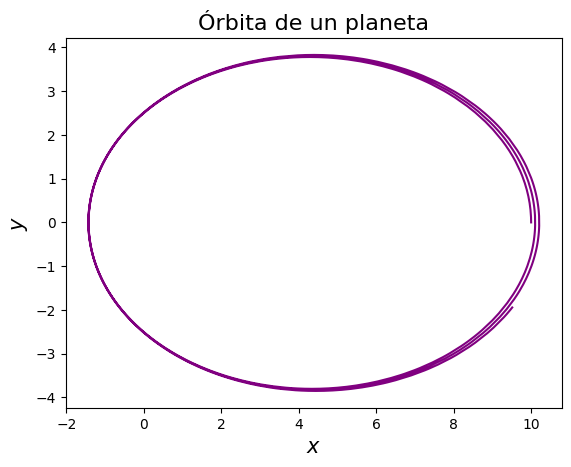

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

datos=pd.read_csv('./datos.dat',sep=' ',names=['x','y'])

plt.plot(datos['x'],datos["y"], "purple")
plt.xlabel("$x$",size=15)
plt.ylabel("$y$",size=15)
plt.title("Órbita de un planeta",size=16)